# Day 13. Task 02
# Бинарный классификатор. SVM. Дерево классификаций

## 0. Импорты

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib import figure
from sklearn import tree

## 1. Препроцессинг данных и визуализация работы логрегрессии

Прочитайте файл `am_pm.csv` с прошлого задания в датафрейм.

1. Нарисуйте график, где ось икс – это am, а ось игрек – это pm. Каждая точка – это конкретный день. Рабочие дни и выходные должны иметь разные цвета на графике.
2. Добавьте разделяющие границы (decision boundaries) логрегрессии на график.
3. Нарисуйте точно такой же график, но теперь цвет зависит от значения столбца с прогнозом.

Теперь вам должно стать понятно, как работает логистическая регрессия.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('../content/drive/MyDrive/School21/day13/data/am_pm.csv')
df

,date,target,am,pm,predict
0,2020-04-17,working_day,21,2,weekend
1,2020-04-18,weekend,1,68,working_day
2,2020-04-19,weekend,18,15,working_day
3,2020-04-20,working_day,2,23,working_day
4,2020-04-21,working_day,0,25,working_day
5,2020-04-22,working_day,0,28,working_day
6,2020-04-23,working_day,10,33,working_day
7,2020-04-24,working_day,2,14,working_day
8,2020-04-25,weekend,30,74,working_day
9,2020-04-26,weekend,28,233,working_day


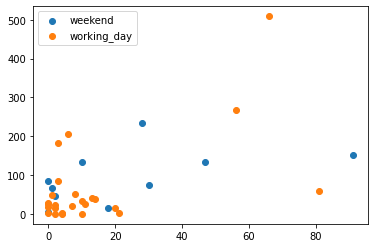

In [ ]:
groups = df.groupby("target")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()
pass    

In [ ]:
df = df.set_index('date')

In [ ]:
df_Y = df['target']

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.drop(columns=['target','predict'],inplace=True)
df_X = df_copy
df_copy

,am,pm
date,,
2020-04-17,21,2
2020-04-18,1,68
2020-04-19,18,15
2020-04-20,2,23
2020-04-21,0,25
2020-04-22,0,28
2020-04-23,10,33
2020-04-24,2,14
2020-04-25,30,74


In [ ]:
clf = LogisticRegression(fit_intercept=False, random_state=21).fit(df_X, df_Y) #обучим модель

In [ ]:
df.reset_index()

,date,target,am,pm,predict
0,2020-04-17,working_day,21,2,weekend
1,2020-04-18,weekend,1,68,working_day
2,2020-04-19,weekend,18,15,working_day
3,2020-04-20,working_day,2,23,working_day
4,2020-04-21,working_day,0,25,working_day
5,2020-04-22,working_day,0,28,working_day
6,2020-04-23,working_day,10,33,working_day
7,2020-04-24,working_day,2,14,working_day
8,2020-04-25,weekend,30,74,working_day
9,2020-04-26,weekend,28,233,working_day


In [ ]:
clf.score(df_X, df_Y)

0.6285714285714286

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


<Figure size 864x576 with 0 Axes>

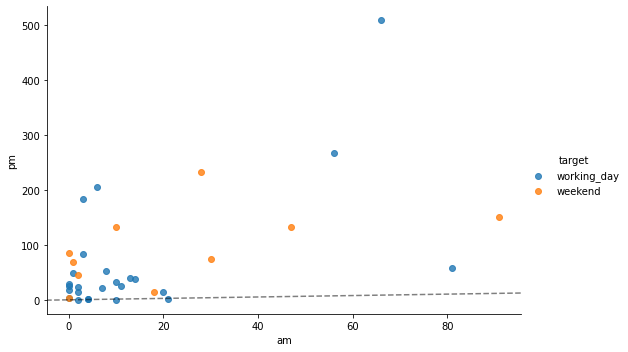

In [ ]:
plt.figure(figsize=(12,8))
a = sns.lmplot(x="am", y="pm", data=df, fit_reg=False, hue='target', legend=True,
          height=5, aspect=1.5)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--', '-', '--'])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


<Figure size 864x576 with 0 Axes>

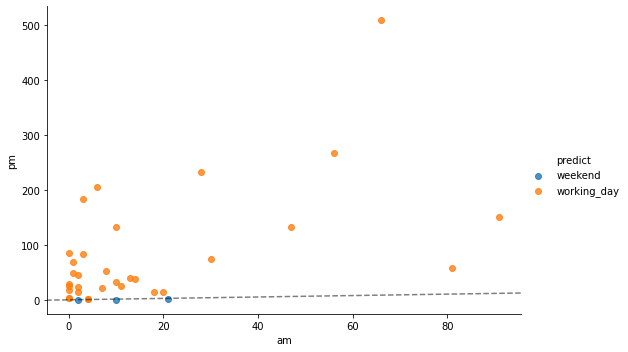

In [ ]:
plt.figure(figsize=(12,8))
a = sns.lmplot(x="am", y="pm", data=df, fit_reg=False, hue='predict', legend=True,
          height=5, aspect=1.5)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--', '-', '--'])

## 2. Стандартизация и логрегрессия

Линейные модели могут быть чувствительны к шкалам ваших признаков. Чтобы снизить эту чувствительность и повысить вероятность более точного прогноза, как вы уже знаете, лучше шкалы ваших признаков стандартизировать.

1. Примените `StandardScaler` к признакам и заново обучите логистическую регрессию, используя те же самые параметры.
2. Посчитайте `accuracy` для новой модели. Теперь модель стала лучше наивного прогноза с самым популярным классом в качестве значения?
3. Нарисуйте снова графики, как выше, но только для новой модели.

In [ ]:
df_copy = df.copy()
scaler = StandardScaler()
df_copy[['am','pm']] = scaler.fit_transform(df_copy[['am','pm']]) #сделаем стандартизацию наших признаков

In [ ]:
df_copy

,target,am,pm,predict
date,,,,
2020-04-17,working_day,0.200690,-0.719904,weekend
2020-04-18,weekend,-0.655914,-0.071822,working_day
2020-04-19,weekend,0.072199,-0.592251,working_day
2020-04-20,working_day,-0.613084,-0.513696,working_day
2020-04-21,working_day,-0.698744,-0.494057,working_day
2020-04-22,working_day,-0.698744,-0.464599,working_day
2020-04-23,working_day,-0.270442,-0.415502,working_day
2020-04-24,working_day,-0.613084,-0.602071,working_day
2020-04-25,weekend,0.586162,-0.012906,working_day


In [ ]:
clf2 = LogisticRegression(fit_intercept=False, random_state=21).fit(df_copy[['am','pm']], df_Y)

In [ ]:
clf2.score(df_copy[['am','pm']], df_Y)  #accuracy метода лог регрессии 

0.7428571428571429

Модель стала лучше (accuracy наивного прогноза 0.7428571428571429
)

In [ ]:
df_copy['predict']=clf2.predict(df_copy[['am','pm']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


<Figure size 864x576 with 0 Axes>

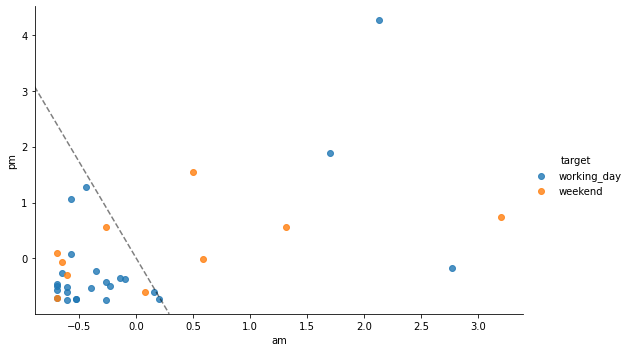

In [ ]:
plt.figure(figsize=(12,8))
a = sns.lmplot('am', 'pm', data = df_copy, fit_reg=False, hue='target', legend=True, height=5, aspect=1.5)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf2.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--', '-', '--'])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


<Figure size 864x576 with 0 Axes>

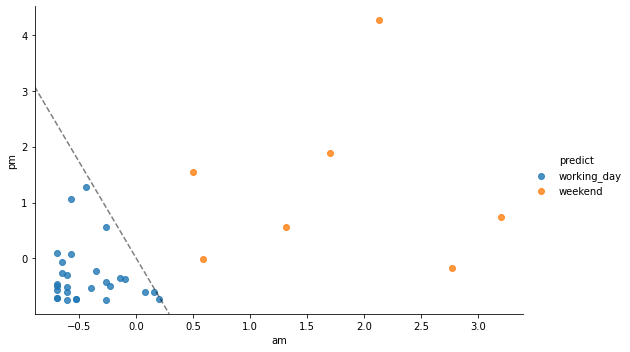

In [ ]:
plt.figure(figsize=(12,8))
a = sns.lmplot(x="am", y="pm", data=df_copy, fit_reg=False, hue='predict', legend=True,
          height=5, aspect=1.5)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf2.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--', '-', '--'])

## 3. SVM

1. Обучите модель `SVC`, используя стандартизированные признаки, и принимая во внимание параметры `probability=True`, `random_state=21`.
2. Посчитайте `accuracy`.
3. Попробуйте разные кернелы и найдите лучший с точки зрения этой метрики.
4. Нарисуйте снова два графика вместе с разделяющими границами, но уже для этого алгоритма, чтобы увидеть, каким образом работает он.

In [ ]:
svc_fit = SVC(C=1.0, 
              kernel='linear',
              degree=3,
              gamma='scale',
              coef0=0.0,
              shrinking=True,
              probability=True,
              random_state=21).fit(df[['am', 'pm']], df.target)

In [ ]:
svc_fit.score(df[['am', 'pm']], df.target)

0.7142857142857143

In [ ]:
svc_fit = SVC(C=1.0, 
              kernel='sigmoid',
              degree=3,
              gamma='scale',
              coef0=0.0,
              shrinking=True,
              probability=True,
              random_state=21).fit(df[['am', 'pm']], df.target)
svc_fit.score(df[['am', 'pm']], df.target)             

0.6857142857142857

In [ ]:
svc_fit = SVC(C=1.0, 
              kernel='rbf',
              gamma='scale',
              coef0=0.0,
              shrinking=True,
              probability=True,
              random_state=21).fit(df[['am', 'pm']], df.target)
svc_fit.score(df[['am', 'pm']], df.target)             

0.7428571428571429

In [ ]:
grid = {'kernel': ['linear', 'poly'],
               'C':[0.1, 1, 10],
                'coef0': [-10, -1, 0, 1, 10]}

In [ ]:
clf = SVC(gamma='scale', shrinking=True, probability=True, random_state=21)

best_score = 0
for g in ParameterGrid(grid):
    clf.set_params(**g)
    clf.fit(df[['am','pm']], df.target)
    score = clf.score(df[['am', 'pm']], df.target)
    if score > best_score:
        best_score = score
        best_grid_forest = g


In [ ]:
score

0.8571428571428571

In [ ]:
df_copy['predict']=svc_fit.predict(df_copy[['am','pm']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


<Figure size 864x576 with 0 Axes>

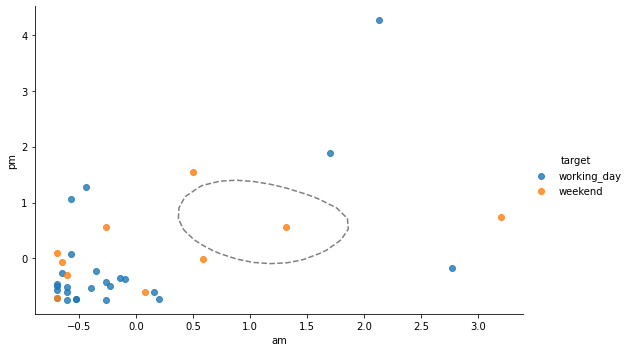

In [ ]:
plt.figure(figsize=(12,8))
a = sns.lmplot('am', 'pm', data = df_copy, fit_reg=False, hue='target', legend=True, height=5, aspect=1.5)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_fit.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--', '-', '--'])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


<Figure size 864x576 with 0 Axes>

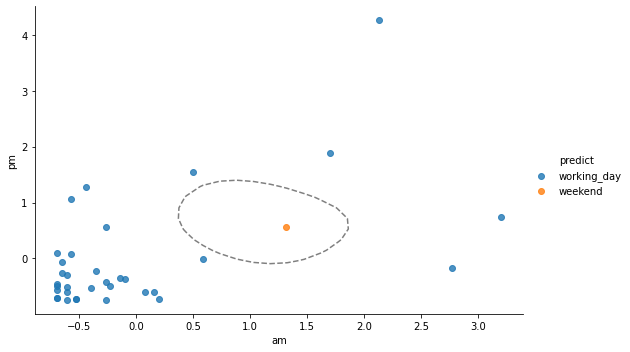

In [ ]:
plt.figure(figsize=(12,8))
a = sns.lmplot(x="am", y="pm", data=df_copy, fit_reg=False, hue='predict', legend=True,
          height=5, aspect=1.5)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_fit.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--', '-', '--'])

## 4. Дерево классификаций

1. Обучите `DecisionTreeClassifier` на стандартизированных признаках, используя параметры `max_depth=4`, `random_state=42`.
2. Посчитайте accuracy.
3. Попробуйте различные значения `max_depth`.
4. Нарисуйте снова оба графика с разделяющими границами, чтобы увидеть как работает этот алгоритм.
5. Воспользуйтесь методом `.plot_tree()`, чтобы визуализировать само дерево. Это еще один способ понять то, как работает этот алгоритм.
6. Сколько "листков" в визуализированном дереве пометили дни как `working_day`? Впишите свой ответ в markdown-ячейку в конце этой секции.

In [ ]:
clf_tree = DecisionTreeClassifier(max_depth=4, random_state=42).fit(df_copy[['am','pm']], df_copy['target'])

In [ ]:
clf_tree.score(df_copy[['am','pm']], df_Y) #accuracy метода дерево решений с max_depth=4 

0.9428571428571428

In [ ]:
df_copy['predict']=clf_tree.predict(df_copy[['am','pm']])

In [ ]:
train_data = np.r_[[df_copy.am], [df_copy.pm]]
train_labels = np.r_[df_copy.target]
train_data = train_data.transpose()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: No contour levels were found within the data range.
  app.launch_new_instance()


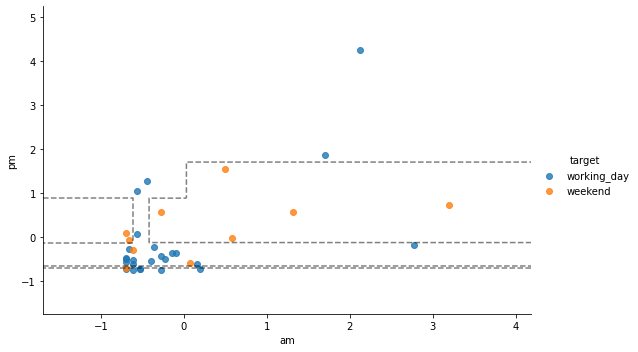

In [ ]:
sns.lmplot('am', 'pm', data = df_copy, fit_reg=False, hue='target', legend=True, height=5, aspect=1.5)
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
ax = plt.gca()

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
# plot decision boundary and margins
ax.contour(xx, yy, predicted, colors='k', levels=[0], alpha=0.5,
           linestyles=['--', '-', '--'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.


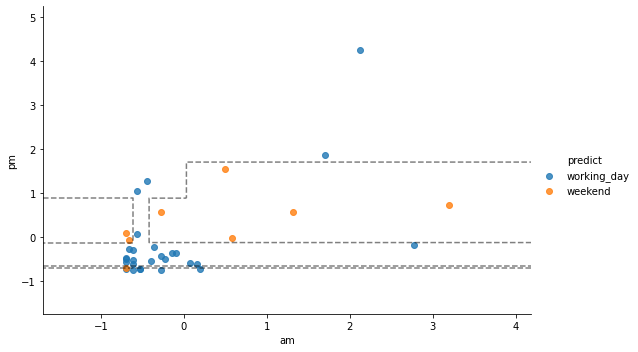

In [ ]:
from sklearn.tree import DecisionTreeClassifier
sns.lmplot('am', 'pm', data = df_copy, fit_reg=False, hue='predict', legend=True, height=5, aspect=1.5)
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
ax = plt.gca()

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
# plot decision boundary and margins
ax.contour(xx, yy, predicted, colors='k', levels=[0], alpha=0.5,
           linestyles=['--', '-', '--'])

[Text(0.40625, 0.9, 'pm <= -0.121\ngini = 0.408\nsamples = 35\nvalue = [10, 25]\nclass = working_day'),
 Text(0.125, 0.7, 'pm <= -0.705\ngini = 0.227\nsamples = 23\nvalue = [3, 20]\nclass = working_day'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = working_day'),
 Text(0.1875, 0.5, 'pm <= -0.651\ngini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = working_day'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = weekend'),
 Text(0.25, 0.3, 'am <= -0.013\ngini = 0.219\nsamples = 16\nvalue = [2, 14]\nclass = working_day'),
 Text(0.1875, 0.1, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]\nclass = working_day'),
 Text(0.3125, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = working_day'),
 Text(0.6875, 0.7, 'pm <= 0.9\ngini = 0.486\nsamples = 12\nvalue = [7, 5]\nclass = weekend'),
 Text(0.5625, 0.5, 'am <= -0.42\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = weekend'),
 Text(0.5, 0.3, 'am <= -0.613\ngini = 0.444\nsamples = 3\nvalue = [

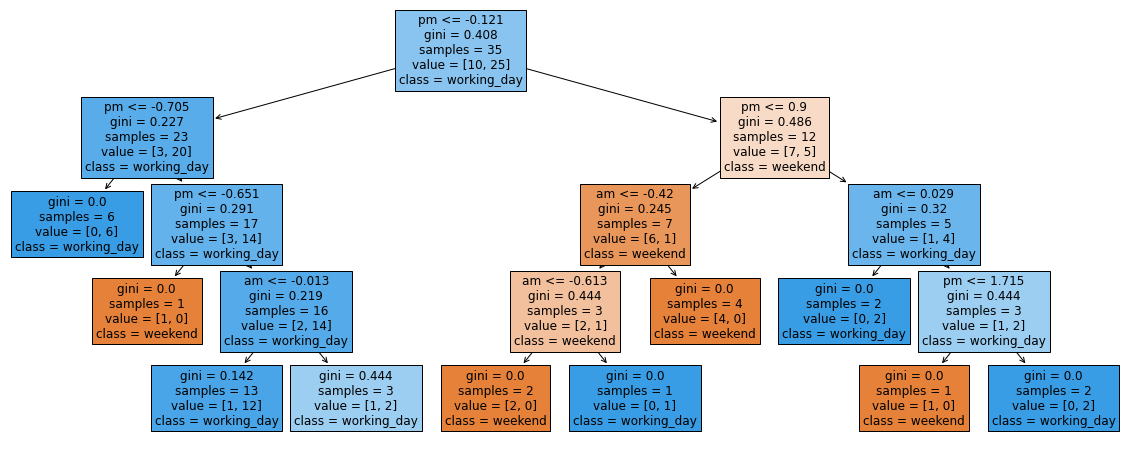

In [ ]:
plt.figure(figsize=(20,8))
tree.plot_tree(clf_tree,  feature_names = ['am','pm'], filled=True, fontsize=12, class_names = clf_tree.classes_)

:**Сколько** "листков" в визуализированном дереве пометили дни как working_day?

Ответ: 4